In [ ]:
# if library is not installed, use this
# pip install colorthief
# !pip install easydev                 #version 0.12.0
# !pip install colormap                #version 1.0.4
# !pip install opencv-python           #version 4.5.5.64
# !pip install colorgram.py            #version 1.2.0
# !pip install extcolors               #version 1.0.0

In [2]:
#numpy and pandas
import numpy as np
from numpy import asarray
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# image processing tool
from glob import glob
import cv2
import extcolors
from colormap import rgb2hex
from PIL import Image
import imageio


In [3]:
# load the image
image1 = Image.open('final_data/shot_eggblue_marilyn_1964-19604.png')
image2 = Image.open('final_data/shot_blue_marilyn_1964-19604.jpg')
image3 = Image.open('final_data/shot_red_marilyn_1964-19604.png')
image4 = Image.open("final_data/shot_orange_marilyn_1964-19604.png")
image5 = Image.open("final_data/shot_turq_marilyn_1964-19604.png")

# convert image2 from jpg into png
image2 = image2.convert('RGBA')
image2.save('final_data/blue.png', 'PNG')

image_url = ['final_data/shot_eggblue_marilyn_1964-19604.png',
             'final_data/blue.png',
             'final_data/shot_red_marilyn_1964-19604.png',
             'final_data/shot_orange_marilyn_1964-19604.png',
            'final_data/shot_turq_marilyn_1964-19604.png']
images = [image1,image2,image3,image4,image5]

In [4]:
# for each image, create Pillow image, and store image data
data_image=[]
for image in images:
    # convert image to numpy array
    data = asarray(image)
    data_image.append(data)
    print(type(data))
    # summarize shape
    print(data.shape)

    # create Pillow image
    image_pillow = Image.fromarray(data)
    print(type(image_pillow))

    # summarize image details
    print(image_pillow.mode)
    print(image_pillow.size)
    print('------------------')

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------


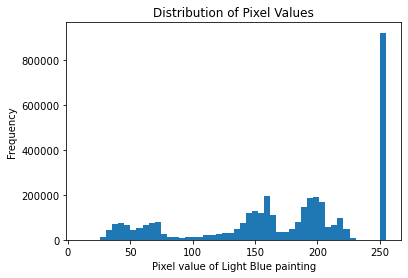

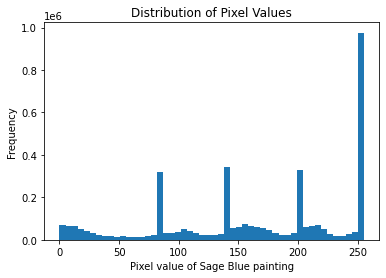

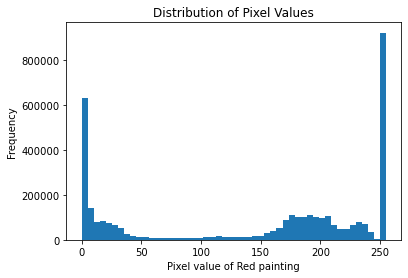

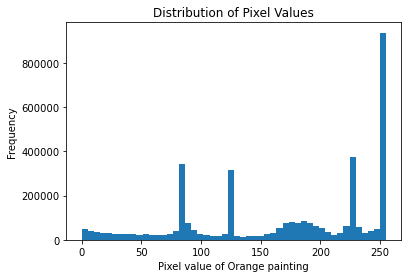

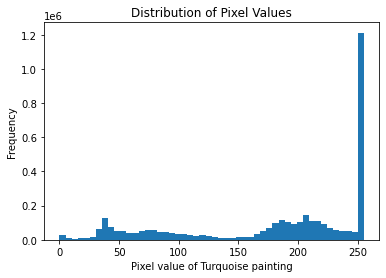

In [5]:
# distribution of pixel values for each image
image_name = ['Light Blue','Sage Blue','Red','Orange','Turquoise']
for data,col_name in zip(data_image,image_name):
    pd.Series(data.flatten()).plot(kind='hist',bins=50,title='Distribution of Pixel Values')
    plt.xlabel("Pixel value of {} painting".format(col_name))
    plt.show()

In [6]:
# This block of code referenced from 
# https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e 


def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

def exact_color(img, img_url, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    
    #crate dataframe
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(img_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

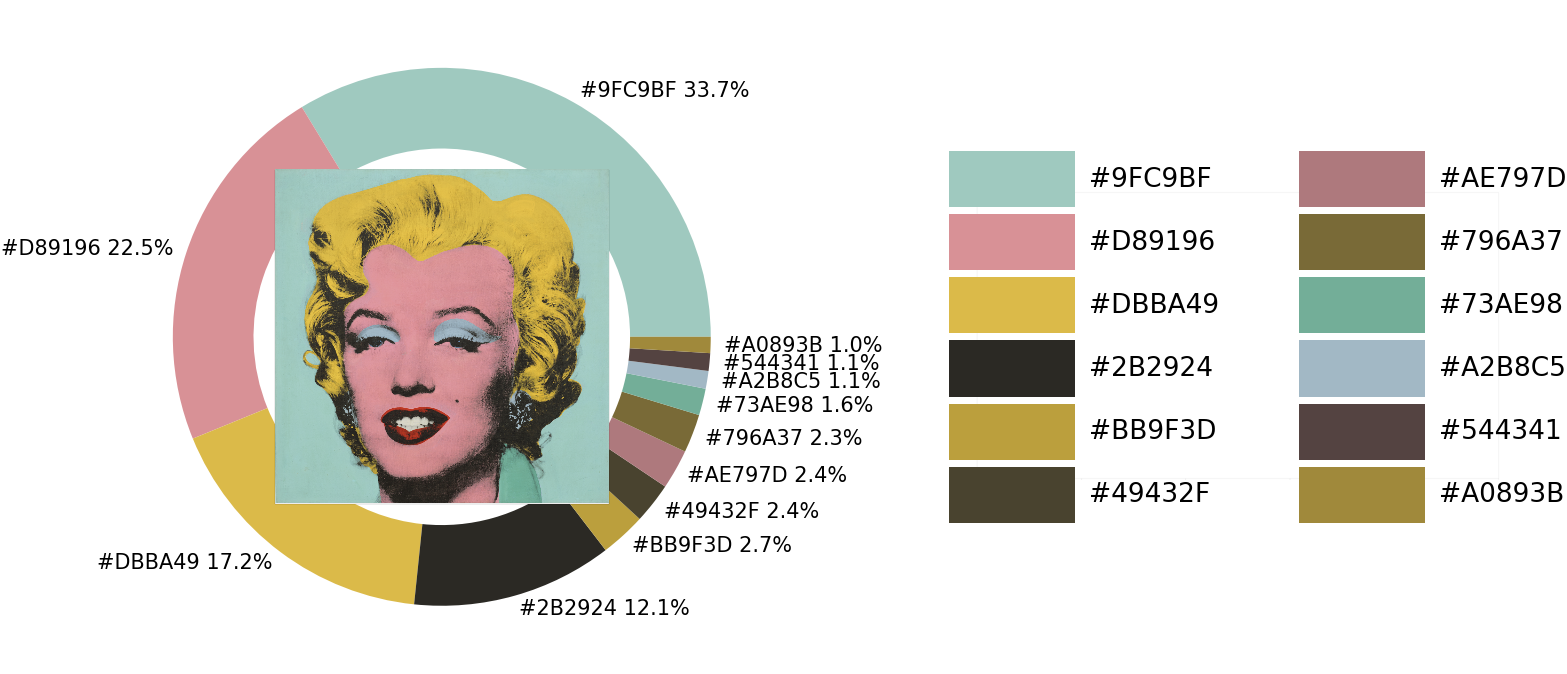

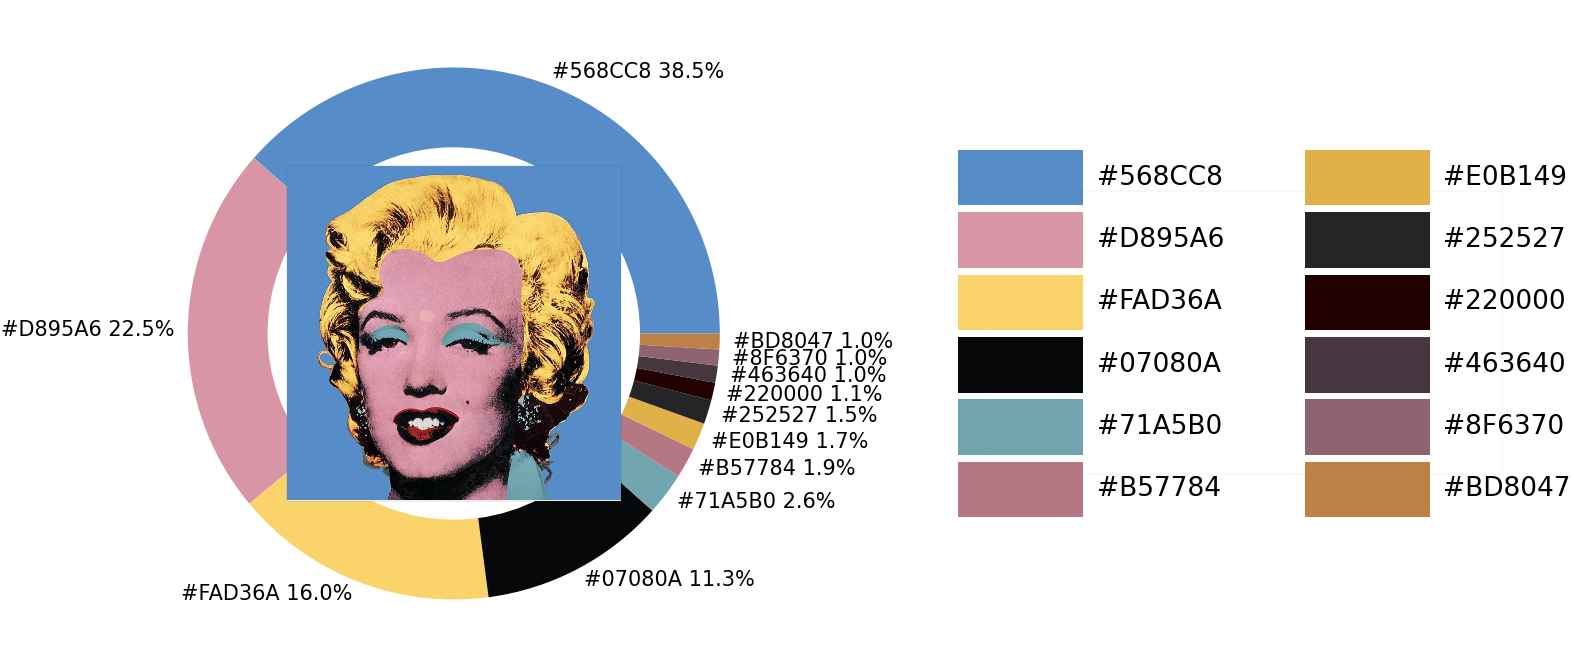

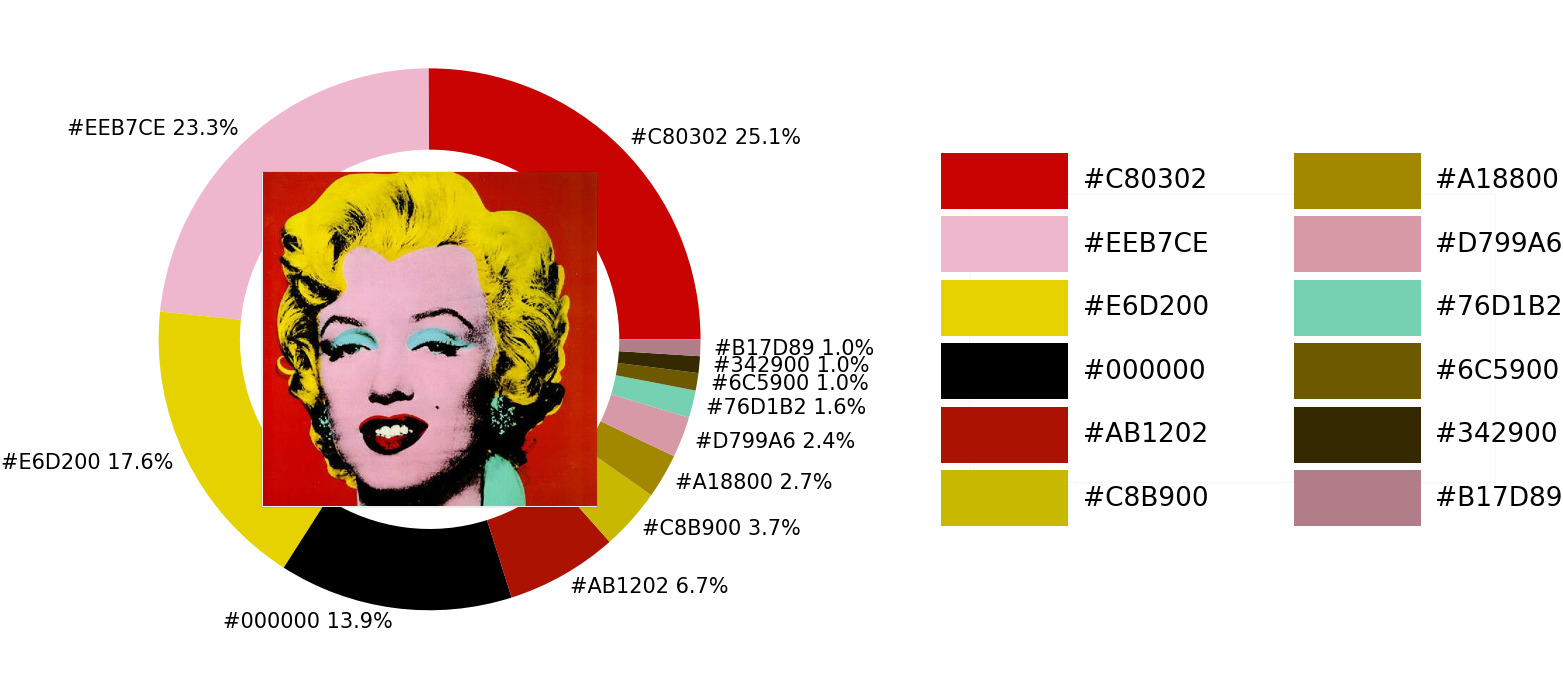

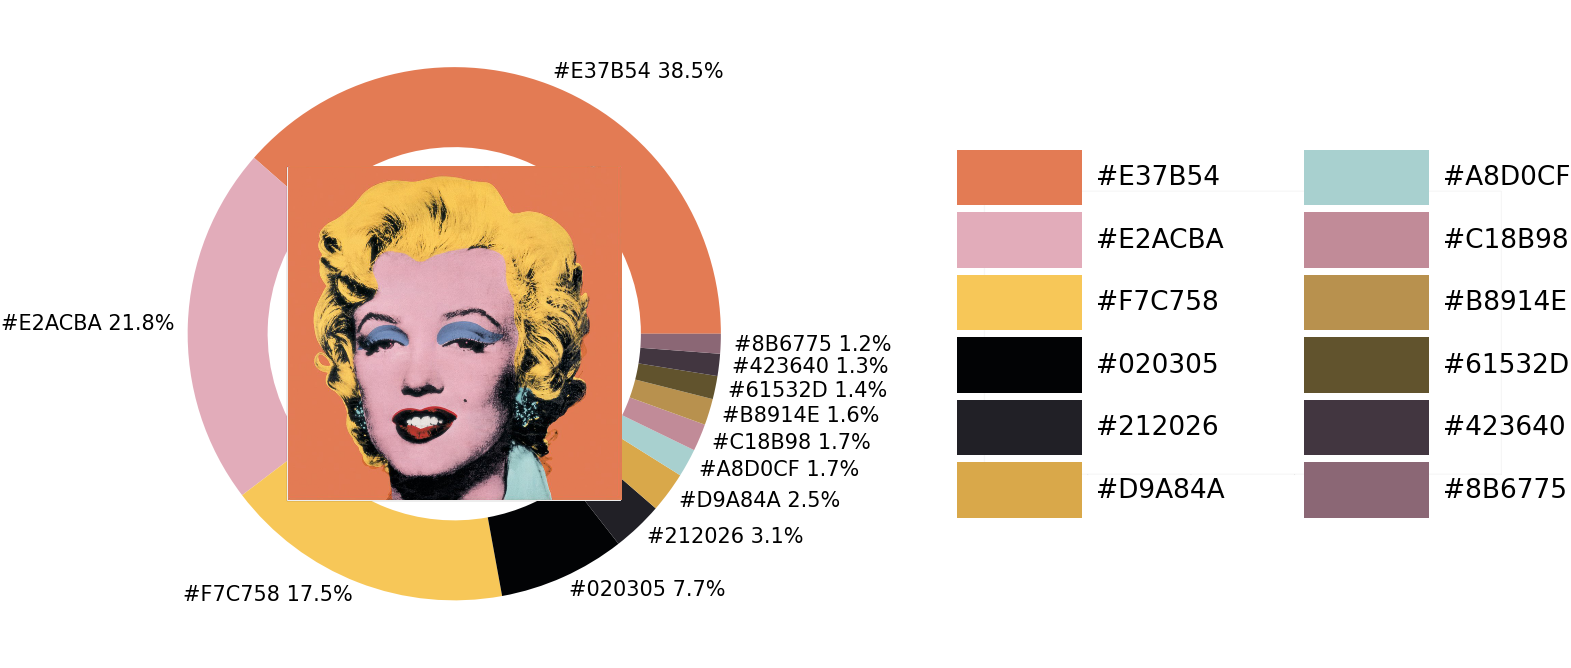

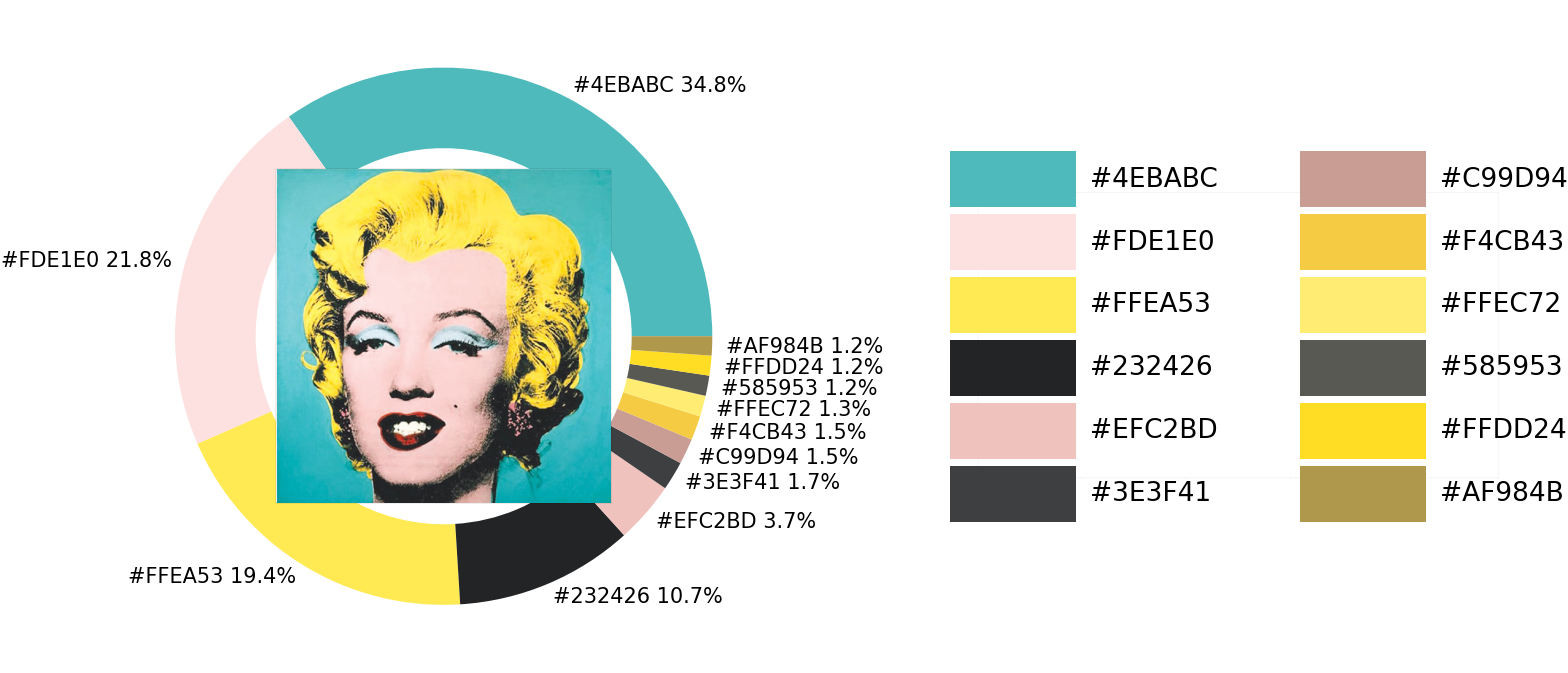

In [7]:
# plot color extraction result for each images used function above
for image,image_name in zip(images,image_url):
    exact_color(image, image_name, 12, 2.5)

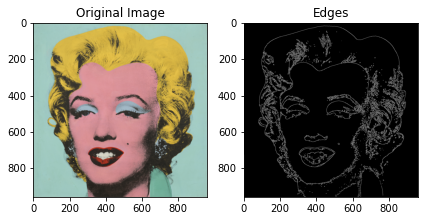

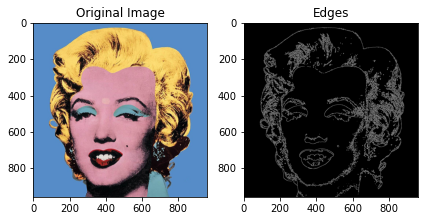

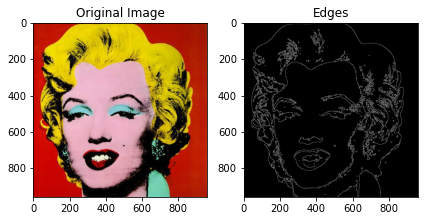

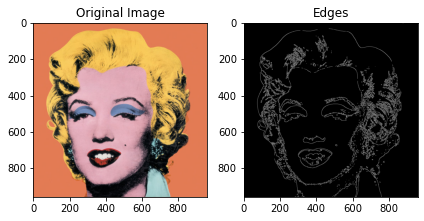

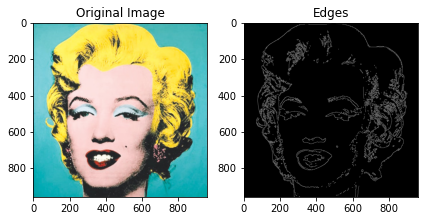

In [34]:
for img_url in image_url:
    img = cv2.imread(img_url)
    # adjust threshold here for different edge detection effect, lower value = more lines
    edges = cv2.Canny(img,200,250,L2gradient=False)

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # Display edges image
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')

    plt.tight_layout()
    plt.show()